In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [3]:
mnist=tf.keras.datasets.mnist

In [4]:
(X_train,y_train), (x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [9]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train=tf.keras.utils.normalize(X_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [6]:
model=tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

In [7]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [34]:
model.fit(X_train,y_train,batch_size=1000,epochs=30)

Epoch 1/30
60/60 [==============================] - 1s 8ms/step - loss: 3.2899e-04 - accuracy: 1.0000
Epoch 2/30
60/60 [==============================] - 1s 8ms/step - loss: 1.2161e-04 - accuracy: 1.0000
Epoch 3/30
60/60 [==============================] - 1s 8ms/step - loss: 8.6837e-05 - accuracy: 1.0000
Epoch 4/30
60/60 [==============================] - 0s 8ms/step - loss: 7.3213e-05 - accuracy: 1.0000
Epoch 5/30
60/60 [==============================] - 1s 8ms/step - loss: 6.4668e-05 - accuracy: 1.0000
Epoch 6/30
60/60 [==============================] - 0s 8ms/step - loss: 5.8094e-05 - accuracy: 1.0000
Epoch 7/30
60/60 [==============================] - 1s 8ms/step - loss: 5.2628e-05 - accuracy: 1.0000
Epoch 8/30
60/60 [==============================] - 1s 8ms/step - loss: 4.8302e-05 - accuracy: 1.0000
Epoch 9/30
60/60 [==============================] - 1s 8ms/step - loss: 4.4412e-05 - accuracy: 1.0000
Epoch 10/30
60/60 [==============================] - 1s 8ms/step - loss: 4.1247e-0

In [35]:
model.save("handwritten_digit_recognition.model")

INFO:tensorflow:Assets written to: handwritten_digit_recognition.model\assets


INFO:tensorflow:Assets written to: handwritten_digit_recognition.model\assets


In [36]:
model=keras.models.load_model("handwritten_digit_recognition.model")

In [37]:
loss,accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1626 - accuracy: 0.9760


1/1 [==============================] - 0s 73ms/step
This digit is probably a 1


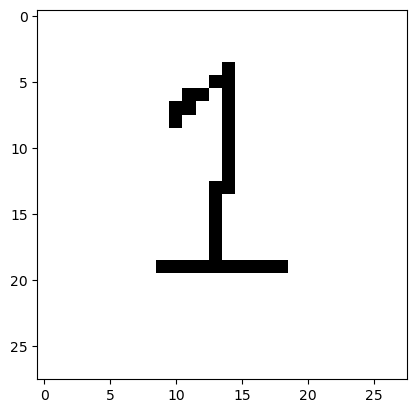

1/1 [==============================] - 0s 32ms/step
This digit is probably a 7


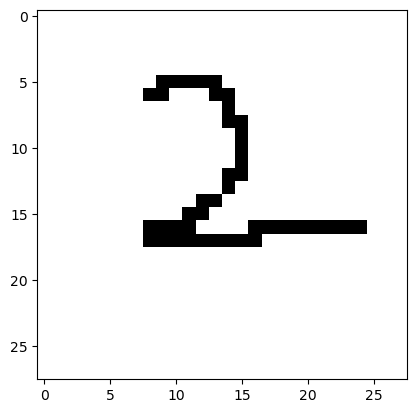

1/1 [==============================] - 0s 30ms/step
This digit is probably a 3


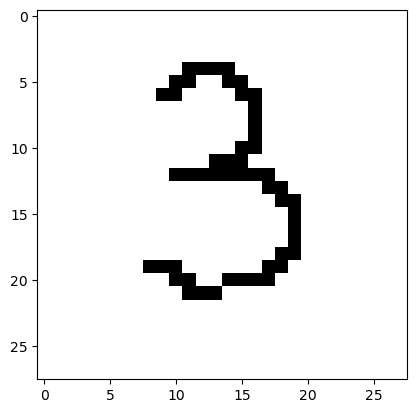

1/1 [==============================] - 0s 32ms/step
This digit is probably a 9


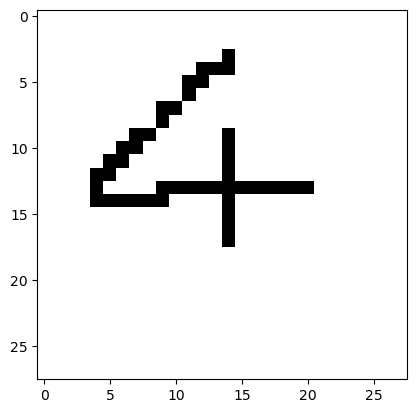

1/1 [==============================] - 0s 35ms/step
This digit is probably a 2


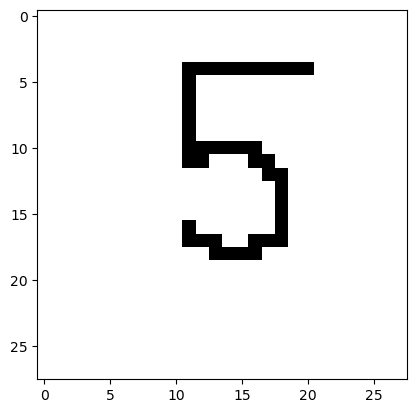

1/1 [==============================] - 0s 31ms/step
This digit is probably a 4


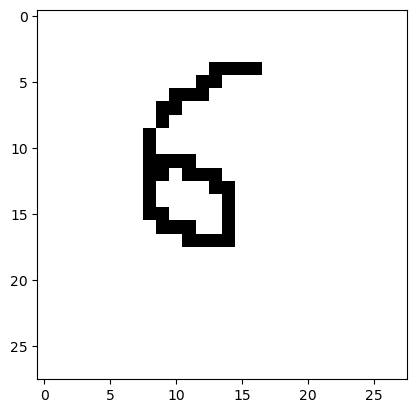

1/1 [==============================] - 0s 36ms/step
This digit is probably a 7


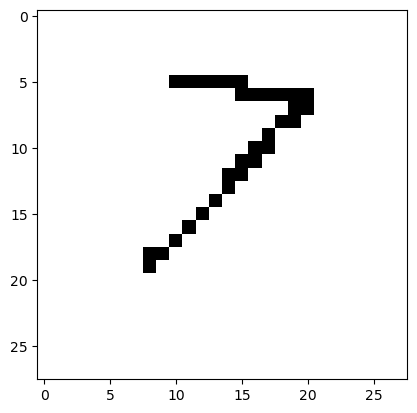

1/1 [==============================] - 0s 32ms/step
This digit is probably a 2


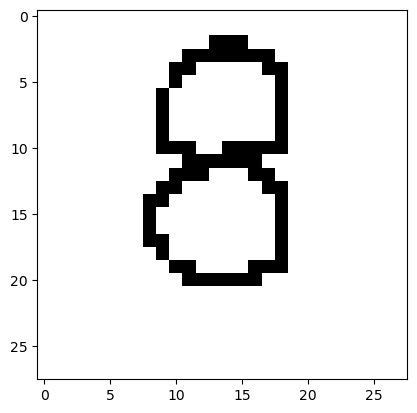

1/1 [==============================] - 0s 30ms/step
This digit is probably a 9


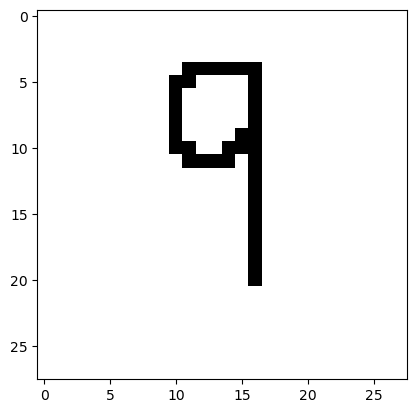

In [38]:
image_number=1
while os.path.isfile(f"digit/{image_number}.png"):
    try:
        img=cv2.imread(f"digit/{image_number}.png")[:,:,0]
        img=np.invert(np.array([img]))
        prediction=model.predict(img)
        print(f"This digit is probably a {np.argmax(prediction)}")
        plt.imshow(img[0],cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error")
    finally:
        image_number+=1